In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import constants as const
from phidl import quickplot as qp
from phidl import Device
from phidl import CrossSection
from phidl import Path
import phidl.geometry as pg
import phidl.routing as pr
import phidl.path as pp
import pprint

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
import qubit_templates
from qubit_templates import *
from functions import *

# Read configuration file

In [3]:
feedline_qubit_gap = 3

outname = "FeedLine_Qubit"

config = load_config( f"config/common.yaml" )
globals().update(config)
qubit_templates.__dict__.update(config)

config = load_config( f"config/FeedLine_Qubit.yaml" )
# グローバル変数として定義
globals().update(config)
qubit_templates.__dict__.update(config)

# Launch pad

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


0


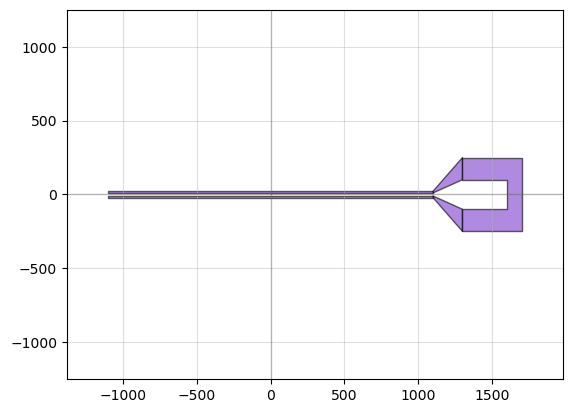

In [4]:
chipdesign = Device('chipdesign')
FL = device_FeedLine_Tc( open_to_ground = True )
FL.rotate(-90)
chipdesign.add_ref(FL.device)
qp(chipdesign)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


1


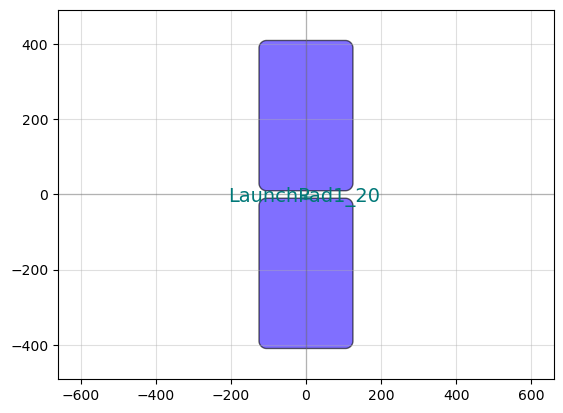

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


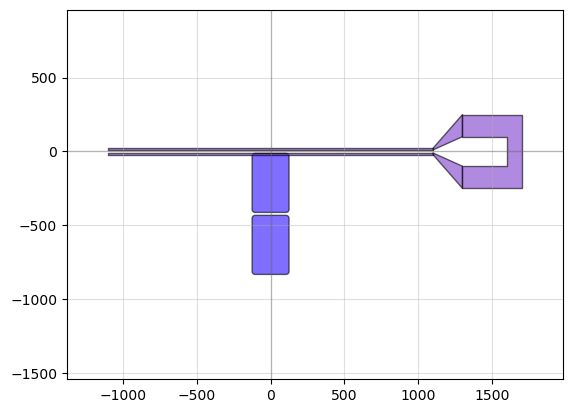

In [5]:
Qubit = device_Pad()
qp(Qubit.metal)
Qubit.movey( -(Pad_height + 0.5*Pad_gap + 0.5*LaunchPad_trace_width + feedline_qubit_gap) )
chipdesign.add_ref(Qubit.metal)
qp(chipdesign)

## Make inverted design for Qiskit-metal

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


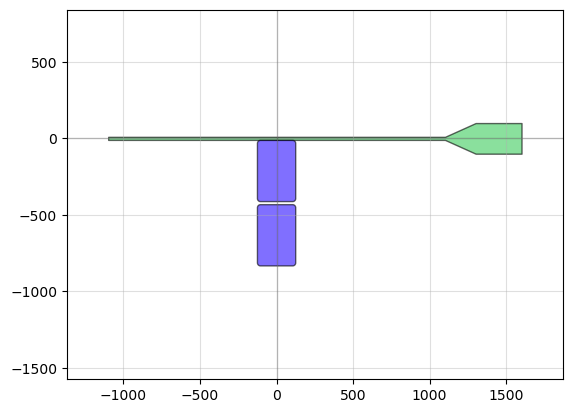

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


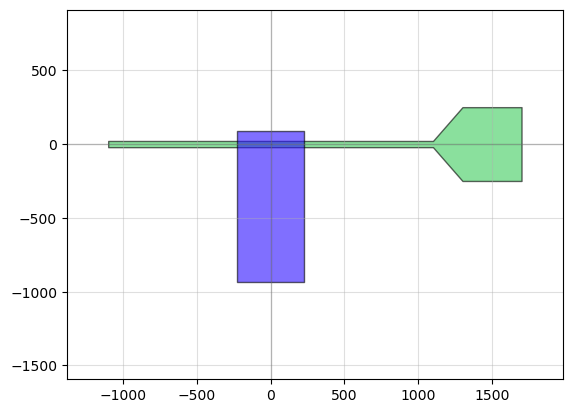

{'FeedLine': {'layer': 0, 'ports': {'LaunchPad0': {'start': [1700.0, -99.99999999999993], 'end': [1700.0, 100.00000000000007], 'width': 200.0, 'gap': 100.0}}}, 'Qubit': {'layer': 1}}


In [6]:

device_list = [
    dict(device = FL, name = "FeedLine"),
    dict(device = Qubit, name = "Qubit")
]

phidl_to_metal(
    device_list = device_list, 
    outname = outname
)